In [ ]:
'''
first we have imported all the necessary libraries that we used in this code.
like: seaborn,pandas,numpy
then we read our dataset of atack files.then we plot some graphs like ,histogram and countplot.
then we get the shape of the data nd removed some of the columns just to improving the accuracy.
afterthat we counted all the null values and get the shape.
then we removed the space from the columns.
afterthat we filled nan values with 0 and done labelling here.
In feature engineering we have selected some of the features and drop them that is taken for the prediction.
then we have applied and showed some of the imported features.
afterthat we used labelimg and normaliztion technique.
the models we have used in this code i.e decision tree.
By applying these models we have got thr accuracy that is mentioned in our paper.
then we also find out the accuracy,precision ,recall,f1_score for each model.
as mentioned in our base paper.
the data we have used in this model which is publicly available.
we have used training and testing data in this code.
and then we have done data visualization by showing some of the graph's like count plots
after visualization we have applied labeling,and normalization techniques.
we have also done feaure selection here 
In data visualization especially in intrusion detection graph we have showed the difference between in normal and anomolous.
after visualization we have checked bull values .is there any null value available in our dataset or not.
then we have get the minimum,maximum,standard,mean ,count values by just describe the data.
then we have encoded the labels in columns.
after doing this define our dependent and independent variables.
and the we have discussed about our models in this code.
'''

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing basic libraries
import numpy as np
# im_por_ting numpy library for working on arrays
import pandas as pd
#here we are i_por_ting pandas to read the data
import matplotlib.pyplot as matplot
import seaborn as sns
#seaborn and matplotlib these two libraries are for data visualization
from sklearn import preprocessing
#for preprocessing purpose
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install plot-metric

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# import libraries
from sklearn.utils import shuffle
#for suffling data 
from sklearn.tree import DecisionTreeClassifier 
#import dec_isi_on tr_ee classifier from sci_kit learn
from sklearn.naive_bayes import GaussianNB
#importing naive bays from sklearn
from sklearn.model_selection import train_test_split 
# Import tain_tst_splt function
from sklearn import metrics 
#Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import confusion_matrix, classification_report
#comfusion matrix for tp,fp,tn,fn and classification report for precision,f1score.etc
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from plot_metric.functions import BinaryClassification as BN
from sklearn.preprocessing import StandardScaler
#for standard scaler from sklearn preprocessing for scaling the data

In [ ]:
##_load the data
CSIC_data=pd.read_csv("/content/drive/MyDrive/FULLCODE/attack_file.csv")

In [ ]:
#we have rem_oved first space from clmns val_ues 
CSIC_data['accept_char']=CSIC_data['accept_char'].str.strip()
CSIC_data['accept_lang']=CSIC_data['accept_lang'].str.strip()
CSIC_data['accept_encoding']=CSIC_data['accept_encoding'].str.strip()
CSIC_data['user_agent']=CSIC_data['user_agent'].str.strip()
CSIC_data['cache_control']=CSIC_data['cache_control'].str.strip()
CSIC_data['connection']=CSIC_data['connection'].str.strip()
CSIC_data['nombre']=CSIC_data['nombre'].str.strip()
CSIC_data['login']=CSIC_data['login'].str.strip()
CSIC_data['password']=CSIC_data['password'].str.strip()
CSIC_data['user_agent']=CSIC_data['user_agent'].str.strip()
CSIC_data['pragma']=CSIC_data['pragma'].str.strip()
CSIC_data['content_type']=CSIC_data['content_type'].str.strip()
CSIC_data['cookie']=CSIC_data['cookie'].str.strip()
CSIC_data.head()

,Length_of_cookie,accept,accept_char,accept_encoding,accept_lang,cache_control,connection,content_length,content_type,cookie,...,login,method,nombre,password,password_length,pragma,special_chars,user_agent,user_agent_length,label
0,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,NaN,NaN,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,...,NaN,GET,NaN,NaN,0,no-cache,7,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1
1,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,NaN,NaN,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,...,NaN,GET,NaN,NaN,0,no-cache,7,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1
2,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,NaN,NaN,JSESSIONID=EA414B3E327DED6875848530C864BD8F,...,NaN,GET,NaN,NaN,0,no-cache,7,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1
3,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,NaN,NaN,JSESSIONID=EA414B3E327DED6875848530C864BD8F,...,NaN,GET,NaN,NaN,0,no-cache,7,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1
4,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,NaN,NaN,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,...,NaN,GET,Vino Rioja,NaN,0,no-cache,21,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1


In [ ]:
print('The no of Train data points and features are:',CSIC_data.shape[0],CSIC_data.shape[1])

The no of Train data points and features are: 169065 24


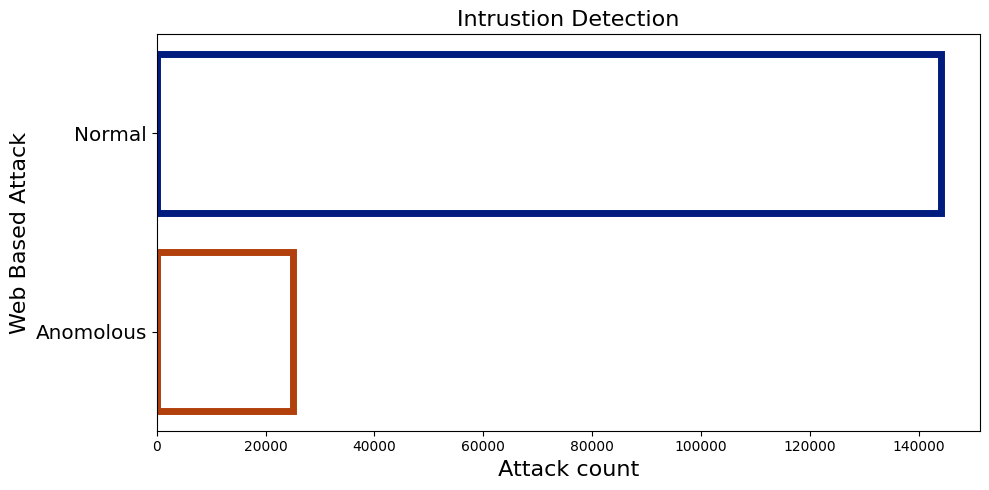

In [ ]:
#count plot to show number of labels
matplot.figure(figsize=(10,5),dpi=100)
#fig_size
cplot=sns.countplot(y='label',data=CSIC_data,facecolor=(0, 0, 0, 0),linewidth=5,palette='Set3',edgecolor=sns.color_palette("dark", 2))
# countplot for web based attack and attack count and fixing color 
matplot.xlabel(' Attack count ',fontsize=16)

##fixing label attack count on x axis and font size 16
matplot.ylabel('Web Based Attack',fontsize=16)
# fixing label on y axis web based attack count and font size 16
labels=['Normal','Anomolous']#here we have two olabel anamolous and normal
cplot.set_yticklabels(labels,rotation=0,fontsize='x-large')
matplot.title("Intrustion Detection",fontsize=16)
#gicing titleof intrusion detection 
matplot.tight_layout()

In [ ]:
##showing describe
CSIC_data.describe()

,Length_of_cookie,content_length,host,keyword_count,length_of_get,password_length,special_chars,user_agent_length,label
count,169065.0,41977.000000,169065.000000,169065.000000,169065.000000,169065.000000,169065.000000,169065.0,169065.000000
mean,43.0,98.861877,8082.371691,0.009878,74.094762,1.662650,15.476923,72.0,0.148257
std,0.0,100.411673,48.885555,0.218473,65.957033,3.635713,12.298718,0.0,0.355355
min,43.0,4.000000,8080.000000,0.000000,22.000000,0.000000,5.000000,72.0,0.000000
25%,43.0,33.000000,8080.000000,0.000000,48.000000,0.000000,8.000000,72.0,0.000000
50%,43.0,60.000000,8080.000000,0.000000,50.000000,0.000000,10.000000,72.0,0.000000
75%,43.0,232.000000,8080.000000,0.000000,62.000000,0.000000,18.000000,72.0,0.000000
max,43.0,836.000000,9090.000000,6.000000,886.000000,57.000000,76.000000,72.0,1.000000


In [ ]:
##checking null value
CSIC_data.isnull().sum()

Length_of_cookie          0
accept                    0
accept_char               0
accept_encoding           0
accept_lang               0
cache_control             0
connection                0
content_length       127088
content_type         127088
cookie                    0
email                147782
host                      0
keyword_count             0
length_of_get             0
login                137197
method                    0
nombre               137203
password             137217
password_length           0
pragma                    0
special_chars             0
user_agent                0
user_agent_length         0
label                     0
dtype: int64

In [ ]:
##_we have fil_led nan with zero
CSIC_data['email']=CSIC_data['email'].fillna('0')
CSIC_data['login']=CSIC_data['login'].fillna('0')
CSIC_data['password']=CSIC_data['password'].fillna('0')
CSIC_data['nombre']=CSIC_data['nombre'].fillna('0')
CSIC_data['content_length']=CSIC_data['content_length'].fillna(0)
CSIC_data['content_type']=CSIC_data['content_type'].fillna('0')                                  
CSIC_data.head()

,Length_of_cookie,accept,accept_char,accept_encoding,accept_lang,cache_control,connection,content_length,content_type,cookie,...,login,method,nombre,password,password_length,pragma,special_chars,user_agent,user_agent_length,label
0,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,0.0,0,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,...,0,GET,0,0,0,no-cache,7,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1
1,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,0.0,0,JSESSIONID=1F767F17239C9B670A39E9B10C3825F4,...,0,GET,0,0,0,no-cache,7,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1
2,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,0.0,0,JSESSIONID=EA414B3E327DED6875848530C864BD8F,...,0,GET,0,0,0,no-cache,7,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1
3,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,0.0,0,JSESSIONID=EA414B3E327DED6875848530C864BD8F,...,0,GET,0,0,0,no-cache,7,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1
4,43,"text/xml,application/xml,application/xhtml+xm...","utf-8, utf-8;q=0.5, *;q=0.5","x-gzip, x-deflate, gzip, deflate",en,no-cache,close,0.0,0,JSESSIONID=81761ACA043B0E6014CA42A4BCD06AB5,...,0,GET,Vino Rioja,0,0,no-cache,21,Mozilla/5.0 (compatible; Konqueror/3.5; Linux)...,72,1


In [ ]:
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
 
# Encode labels in columns
CSIC_data['accept']= label_encoder.fit_transform(CSIC_data['accept'])
CSIC_data['method']= label_encoder.fit_transform(CSIC_data['method'])
CSIC_data['cookie']= label_encoder.fit_transform(CSIC_data['cookie'])
CSIC_data['email']= label_encoder.fit_transform(CSIC_data['email'])
CSIC_data['host']= label_encoder.fit_transform(CSIC_data['host'])
CSIC_data['login']= label_encoder.fit_transform(CSIC_data['login'])
CSIC_data['password']= label_encoder.fit_transform(CSIC_data['password'])
CSIC_data['nombre']= label_encoder.fit_transform(CSIC_data['nombre'])
CSIC_data.loc[CSIC_data['content_type']=='application/x-www-form-urlencoded', 'content_type'] = 1

CSIC_data['accept_char']=1
CSIC_data['accept_encoding']=1
CSIC_data['accept_lang']=1
CSIC_data['cache_control']=1
CSIC_data['connection']=1
CSIC_data['pragma']=1
CSIC_data['user_agent']=1
CSIC_data=CSIC_data.apply(pd.to_numeric, errors='ignore')

In [ ]:
X = CSIC_data.drop(["label"], axis=1)
#dropping label column in x column 
Y = CSIC_data['label']
#targeting label X column in 

In [ ]:
print(X.shape)
#printing X shape
print(Y.shape)
#printing y shape

(169065, 23)
(169065,)


In [ ]:
#splt dat_aset into taining and tsting with respectively 70;30 
(x_train, x_test, y_train, y_test) = train_test_split(X, Y, test_size = 0.3, random_state = 100)
print(x_train.shape, y_train.shape)
#printing the shape of train data
print(x_test.shape, y_test.shape)
# printing the shape of test data

(118345, 23) (118345,)
(50720, 23) (50720,)


In [ ]:
'''
After preprocessing and following these techniques such as
Data visualization
labeling
Normalization
after following these steps;
we have define our dependent and independent variables.
then we have divided our data in two parts i.e training and testing.
and then used only one machine learning models like decision tree model
we have used decision tree model with hyperparameters i.e max_depth.
and get the precision,recall,accuracy and f1 score for each this model.
after getting the training and testing accuracy.
we have also plot con_fus_ion mat_rix and roc curve for both models.
we have also mention the random state in our code.
after that we have done scaling.
and then applied the machine learning models.
first we have define the variable then fitted and predicted the models.
and we have used hyperparametrs in one of them i.e decison tree classifier model.
IN each mode we have given differnt models.
then fit these models with training x and training y.
after fitting our model we have predicted it using x train.
and then get the genuine result.
we have followed the same process in every model that we have used in this code.
but one of them we have used hyperparametrs.like max_deph,estimatrs etc.

'''

'\nAfter preprocessing and following these techniques such as\nData visualization\nlabeling\nNormalization\nafter following these steps;\nwe have define our dependent and independent variables.\nthen we have divided our data in two parts i.e training and testing.\nand then used only one machine learning models like decision tree model\nwe have used decision tree model with hyperparameters i.e max_depth.\nand get the precision,recall,accuracy and f1 score for each this model.\nafter getting the training and testing accuracy.\nwe have also plot con_fus_ion mat_rix and roc curve for both models.\nwe have also mention the random state in our code.\nafter that we have done scaling.\nand then applied the machine learning models.\nfirst we have define the variable then fitted and predicted the models.\nand we have used hyperparametrs in one of them i.e decison tree classifier model.\nIN each mode we have given differnt models.\nthen fit these models with training x and training y.\nafter fitt

In [ ]:
#decision tree classifier with max_depth = 60
Dcsion_tr=DecisionTreeClassifier(max_depth=60)
Dcsion_tr.fit(x_train, y_train)
#fiting our model with training data 
tree_pred=Dcsion_tr.predict(x_train)
#mak_ing preediction on train data

In [ ]:
# we have given output as the model's taining accuracy, precision, f1score, and AUC


#calculate taining scores
training_acc=accuracy_score(y_train,tree_pred)
# taining accuracy of dec_isi_on tr_ee clas_sif_ier 

training_pre=precision_score(y_train,tree_pred)
# taining acc_uracy of dec_isi_on tr_ee clas_sif_ier 

training_rec=recall_score(y_train,tree_pred)
# taining acc_uracy of dec_isi_on tr_ee clas_sif_ier 

training_f1score=f1_score(y_train,tree_pred)
# taining accuracy of dec_isi_on tr_ee clas_sif_ier 

fpr, tpr, _ = metrics.roc_curve(y_train,tree_pred)
# taining accuracy of dec_is_ion tr_ee clas_sif_ier 

training_auc = metrics.roc_auc_score(y_train,tree_pred)
# taining ac_cur_acy of de_c_is_ion tr_ee cla_ssi_fier 


In [ ]:
##_we have given outputas the model's taining accuracy, precision, f1score, and AUC

#prining taining accuracy of model
print("  Decision_tree Training accuracy : %0.2f" % (training_acc*100))
#prining taining accuracy of model

print('  Decision_tree Training Precision : %0.2f' % (training_pre*100))
#prining taining precision of model

print(' Decision_tree Training Recall : %0.2f' % (training_rec*100))
#prining taining recall of model

print(' Decision_tree Training F1-Score : %0.2f' % (training_f1score*100))
#prining taining F1score of model

print(' Decision_tree Training AUC : %0.2f' % (training_auc*100))
#prining taining AUC of model

  Decision_tree Training accuracy : 98.14
  Decision_tree Training Precision : 99.79
 Decision_tree Training Recall : 87.69
 Decision_tree Training F1-Score : 93.35
 Decision_tree Training AUC : 93.83


In [ ]:
#making prediction on testing data of decision tree classifier
tsy_pred=Dcsion_tr.predict(x_test)

In [ ]:
#calculate tsting scores
testing_acc=accuracy_score(y_test,tsy_pred)
# Tsting  acc_ura_cy of dec_isi_on tree clas_sif_ier 

testing_pre=precision_score(y_test,tsy_pred)
# Tsting  ac_cur_acy of de_cis_ion tree cla_ssi_fier 

testing_rec=recall_score(y_test,tsy_pred)
# Tsting  acc_ura_cy of dec_isi_on tree clas_sif_ier  

testing_f1score=f1_score(y_test,tsy_pred)
# Tsting  ac_cur_acy of de_cis_ion tree cla_ssi_fier 

fpr, tpr, _ = metrics.roc_curve(y_test,  tsy_pred)
# Tsting  acc_ura_cy of dec_isi_on tree clas_sif_ier 

testing_auc = metrics.roc_auc_score(y_test, tsy_pred)
# Tsting  ac_cur_acy of de_cis_ion tree cla_ssi_fier 


In [ ]:
# outputting the model's training accuracy, precision, f1score, and AUC

print("Testing accuracy : %0.2f" % (testing_acc*100))
#prining tsting accuracy of model

print('Testing Precision : %0.2f' % (testing_pre*100))
#prining tsting Precision of model

print('Testing Recall : %0.2f' % (testing_rec*100))
#prining tsting Precision of model

print('Testing F1-Score : %0.2f' % (testing_f1score*100))
#prining tsting Precision of model

print('Testing AUC : %0.2f' % (testing_auc*100))
#prining tsting Precision of model

Testing accuracy : 90.97
Testing Precision : 70.92
Testing Recall : 64.73
Testing F1-Score : 67.68
Testing AUC : 80.09


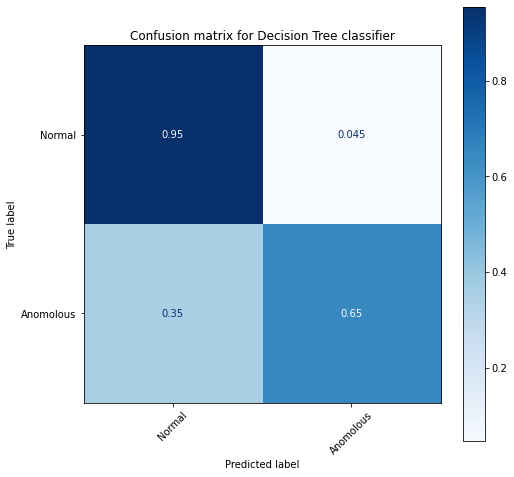

In [ ]:
# showing a con_fus_ion matrix for tsting.setting fig size 8,8 and fixing subplots using plot con_fus_ion matrix  with x ticks and y tticks label visualzing by matplotlb
fig,ax=matplot.subplots(figsize=(8,8))
matplot.grid(False)
#plotting confusion matrix with normalization 
matrix = plot_confusion_matrix(Dcsion_tr, x_test, y_test, cmap=matplot.cm.Blues, normalize='true', ax = ax)
matplot.xticks([0, 1], ['Normal', 'Anomolous'], rotation = 45)
matplot.yticks([0, 1], ['Normal', 'Anomolous'])
matplot.title('Confusion matrix for Decision Tree classifier')#title for our graph confusion matrix 
matplot.show(matrix)#plotting confusion matrix by matplotlib show function

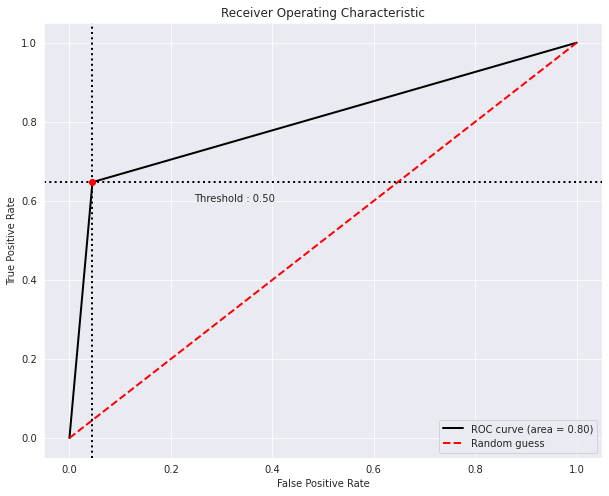

In [ ]:
#testing ROC curve
# Visualisation with plot_metric
bc = BN(y_test, tsy_pred, labels = ['Normal','Anomolous'])

# Figures
matplot.figure(figsize=(10,8))
bc.plot_roc_curve()
matplot.show()

In [ ]:
'''
In Decision tree classifier we have predicted and fit the model nd given the hyperparameter which will help in improving our accuracy.
in which we have done the first step i.e fitting our model then predicted the model and also given the hyperparameters which helps in increasing the accuracy.
the models we have used in this code. we have find out the accuracy,precision ,recall for each model
then we showed the confusion matrix for each model, and thier graph as well.
Imported some important library like pandas,labelencoder,train_test_split,dt,dnn etc. 
we hve used the 'attack files' dataset which is publicly available
then we checked null values,shape and plot some graph like countplot and histogram.
then we have done labelling.but before labeling dropped some columns from the dataframe.
afterthat we used models decision tree classifier which has given the accuracy that is mentioned below.
Testing accuracy:-
                    Decision tree classifier = 0.90
which has mentioned in our base paper.
In Decision tree classifier model we have given the hyperparameter i.e max_depth which has a role to improve the accuracy.
we have also find out the precision,f1,recall score,accuracy and AUC.
after that we have also plot confusion matrix and ROC curve as well.
In matrix we have define the normal and anomolous in true label and predicted label.
define the title as well confusion matrix for decision tree classifier.
and in roc curve we have also done same thing but we have also define true and false posotive rate.
and given the title as well receiver operator characterstics.

'''